# Prompt Analyser 
This project aims to find the nuances in prompt engineering and determine how different prompt phrasing strategies affect the quality, length, and clarity of different types of responses.

**Features**

 - Prompt Type Distribution
 - Length-Based Features
 - Sentiment Analysis
 - Semantic Similarity

In [1]:
# Import libraries and load data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset

df = pd.read_csv("../data/prompt_engineering_dataset.csv")

In [2]:
# Read the first few rows

df.head()

,Prompt,Prompt_Type,Prompt_Length,Response
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree..."
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...
3,Why do you think education is important?,Question,40,I believe education is important because it em...
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce..."


In [3]:
# Basic info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Prompt         5010 non-null   object
 1   Prompt_Type    5010 non-null   object
 2   Prompt_Length  5010 non-null   int64 
 3   Response       5010 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


## Prompt type distribution

In [4]:
# Add the response length distribution

df["Response_Length"] = df["Response"].apply(lambda x: len(x.split())).round(3)
df[["Prompt_Type", "Prompt_Length", "Response_Length"]].describe()

,Prompt_Length,Response_Length
count,5010.000000,5010.000000
mean,29.420359,16.475848
std,7.640619,4.998654
min,15.000000,5.000000
25%,22.000000,14.000000
50%,28.000000,17.000000
75%,38.000000,20.000000
max,40.000000,25.000000


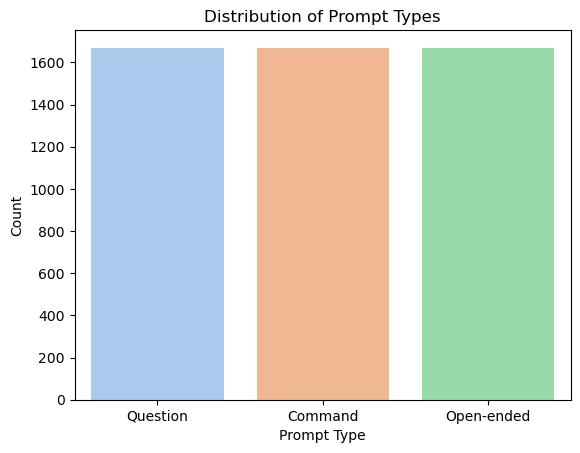

In [5]:
sns.countplot(x="Prompt_Type", hue="Prompt_Type", data=df, palette="pastel", dodge=False)
plt.title("Distribution of Prompt Types")
plt.xlabel('Prompt Type')
plt.ylabel('Count')

plt.show()

#### Average prompt length by type

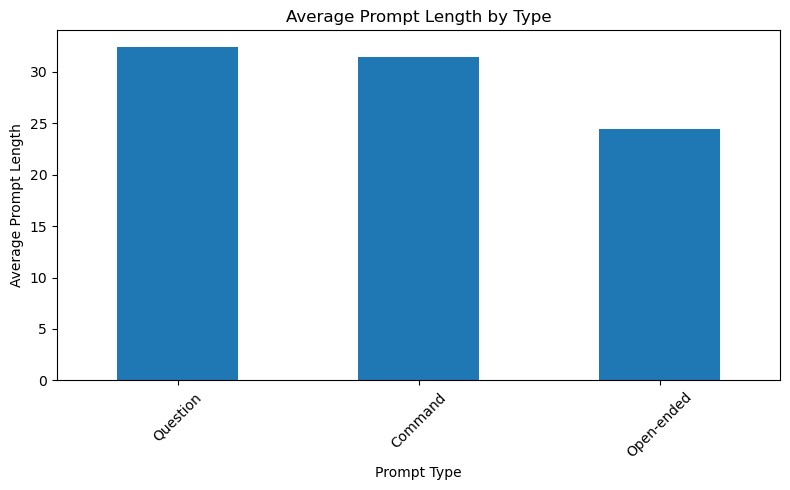

In [36]:
mean_prompt_length = df.groupby("Prompt_Type")["Prompt_Length"].mean().round(2).sort_values(ascending=False)

mean_prompt_length.plot.bar(figsize=(8, 5))
plt.title("Average Prompt Length by Type")
plt.ylabel("Average Prompt Length")
plt.xlabel("Prompt Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Prompt vs Response Length

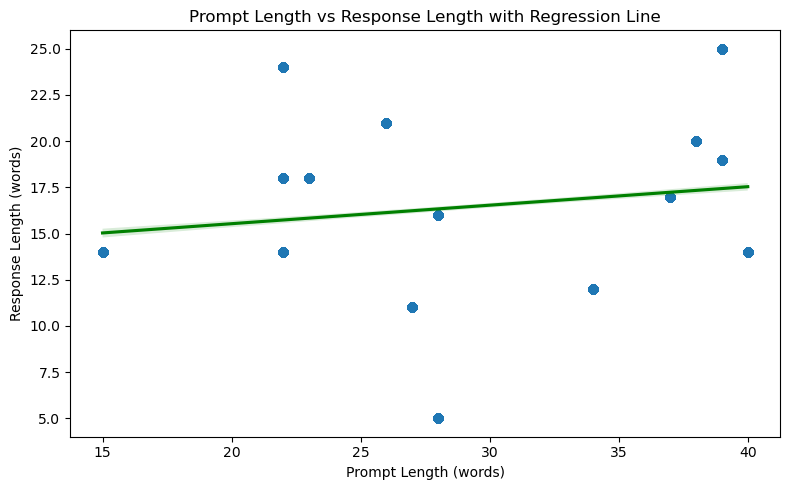

In [8]:
# Scatter Plot - Prompt vs Response Length

plt.figure(figsize=(8, 5))
sns.regplot(x="Prompt_Length", y="Response_Length", data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title("Prompt Length vs Response Length with Regression Line")
plt.xlabel("Prompt Length (words)")
plt.ylabel("Response Length (words)")
plt.tight_layout()
plt.show()

#### Average response length by prompt type

In [34]:
# Avg no.of tokens by Prompt Type

mean_response_length = df.groupby("Prompt_Type")["Response_Length"].mean().round(2).sort_values(ascending=False)
mean_response_length.head()

Prompt_Type
Command      19.830
Open-ended   16.520
Question     13.080
Name: Response_Length, dtype: float64

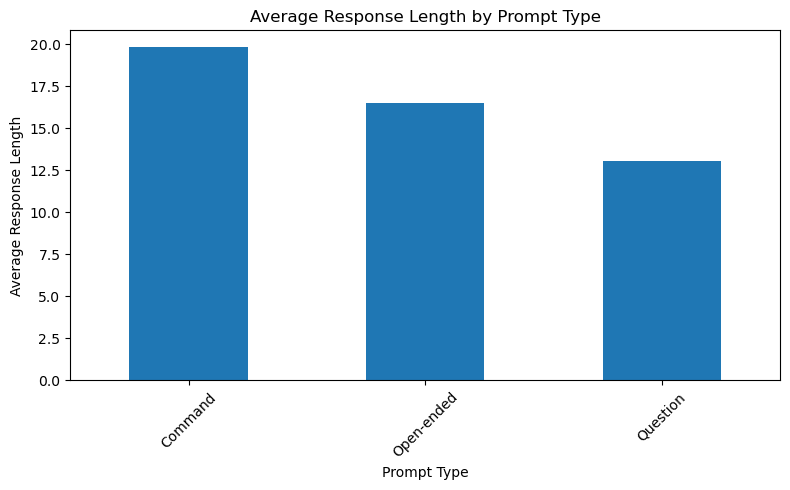

In [35]:
mean_response_length.plot.bar(figsize=(8, 5))
plt.title("Average Response Length by Prompt Type")
plt.ylabel("Average Response Length")
plt.xlabel("Prompt Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Correlation of Response length vs Prompt type

df[["Prompt_Length", "Response_Length"]].corr()

,Prompt_Length,Response_Length
Prompt_Length,1.000000,0.153082
Response_Length,0.153082,1.000000


## Length-Based features

 - This section helps to explore the diffreneces in:
    - Character length
    - Word Length
    - Average Word Length

 - These are helpful for the future analysis when identifying how prompt structure and length impact llm responses to them.

In [11]:
# Metrics

df["Response Char Length"] = df["Response"].apply(len).astype(float)
df["Response Word Length"] = df["Response"].apply(lambda x: len(x.split())).astype(float)
df["Avg Word Length"] = df["Response"].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Check the correlations for each length based feature in a correlation map

df[["Prompt_Length", "Response Char Length", "Response Word Length", "Avg Word Length"]].corr()


,Prompt_Length,Response Char Length,Response Word Length,Avg Word Length
Prompt_Length,1.000,0.415,0.153,0.616
Response Char Length,0.415,1.000,0.915,0.376
Response Word Length,0.153,0.915,1.000,-0.012
Avg Word Length,0.616,0.376,-0.012,1.000


#### Textual Complexity Scores

 - Help in evaluating how readable or complex the responses are to variants of prompts.

In [12]:
import textstat

df["Flesch_Reading_Ease"] = df["Response"].apply(textstat.flesch_reading_ease)
df["Gunning_Fog_Index"] = df["Response"].apply(textstat.gunning_fog)

# Correlate complexity with prompt type or length
df.groupby("Prompt_Type")[["Flesch_Reading_Ease", "Gunning_Fog_Index"]].mean()

,Flesch_Reading_Ease,Gunning_Fog_Index
Prompt_Type,,
Command,50.353,13.496
Open-ended,77.072,6.853
Question,42.999,12.969


## Sentiment Analysis

 - Sentiment Analysis is important for analysing prompt nuances, the delivery of responses can be detrmined by utlising snetiment scores to evaluate how certain prompt structure lead LLM's to respond in a particular emotional tone.

##### Calculating and Plotting the sentiment by prompt type

In [32]:
from textblob import TextBlob

df["Polarity"] = df["Response"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Subjectivity"] = df["Response"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Correlation with prompt type or length
mean_sentiment_type = df.groupby("Prompt_Type")[["Polarity", "Subjectivity"]].mean()
mean_sentiment_type.head()   

,Polarity,Subjectivity
Prompt_Type,,
Command,0.057,0.430
Open-ended,0.440,0.681
Question,0.105,0.482


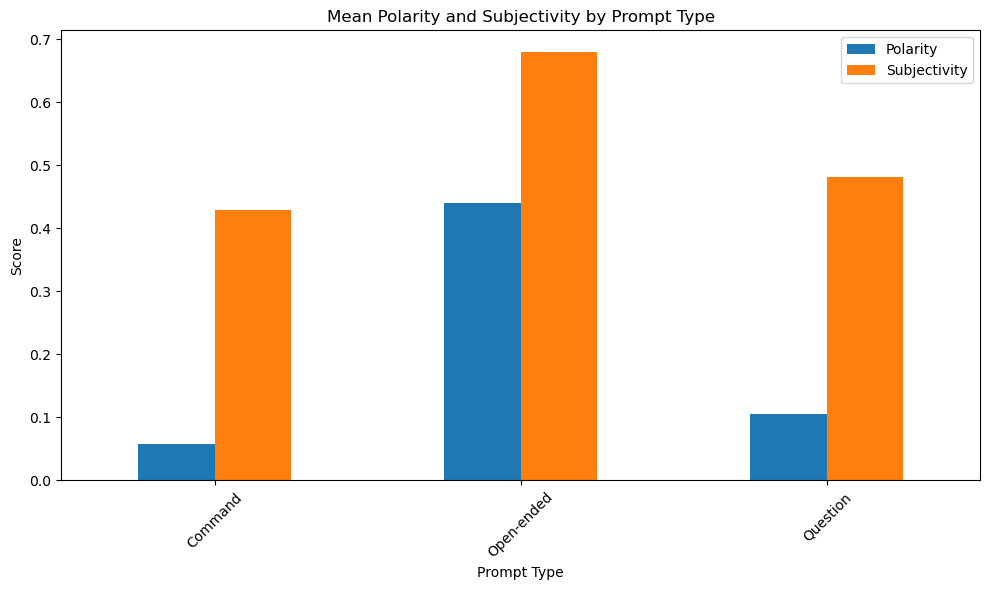

In [31]:
mean_sentiment_type.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Polarity and Subjectivity by Prompt Type")
plt.ylabel("Score")
plt.xlabel("Prompt Type")
plt.xticks(rotation=45)
plt.legend(["Polarity", "Subjectivity"])
plt.tight_layout()
plt.show()

#### Calculating and Plotting the sentiment by prompt length

In [ ]:
mean_sentiment_length = df.groupby("Prompt_Length")[["Polarity", "Subjectivity"]].mean()
mean_sentiment_length.head()

,Polarity,Subjectivity
Prompt_Length,,
15,0.713,0.637
22,0.267,0.517
23,0.437,0.668
26,-0.246,0.510
27,0.633,0.517


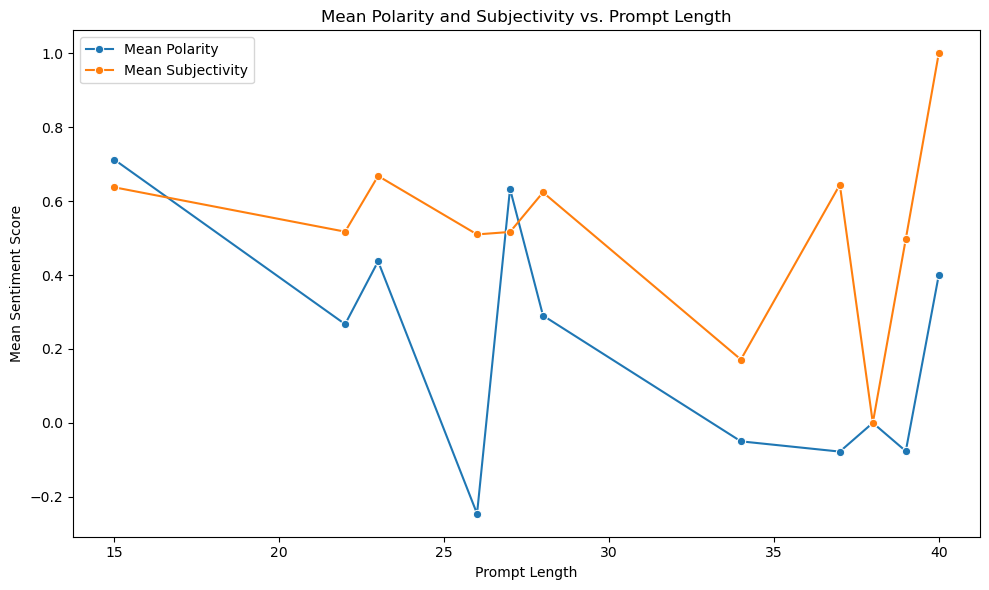

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_sentiment_length, x="Prompt_Length", y="Polarity", label="Mean Polarity", marker="o")
sns.lineplot(data=mean_sentiment_length, x="Prompt_Length", y="Subjectivity", label="Mean Subjectivity", marker="o")
plt.xlabel("Prompt Length")
plt.ylabel("Mean Sentiment Score")
plt.title("Mean Polarity and Subjectivity vs. Prompt Length")
plt.legend()
plt.tight_layout()
plt.show()

## Sematic Similarity

 - This section helps to conculde how similar responses are - (useful to compare variants of prompts)

In [15]:
# Prompt-Response Alignment Score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fit the vectorizer on both prompts and responses
tfidf = TfidfVectorizer()
tfidf.fit(pd.concat([df["Prompt"], df["Response"]]))

prompt_tfidf_matrix = tfidf.transform(df["Prompt"])
response_tfidf_matrix = tfidf.transform(df["Response"])

alignment_scores = []
for i in range(len(df)):
    similarity = cosine_similarity(prompt_tfidf_matrix[i], response_tfidf_matrix[i])[0][0]
    alignment_scores.append(similarity)

df["Alignment_Score"] = alignment_scores

print(alignment_scores)

[np.float64(0.3456787217242289), np.float64(0.22990298734952463), np.float64(0.09518407568201077), np.float64(0.24712355558510274), np.float64(0.08260619331524567), np.float64(0.1225835505600165), np.float64(0.24712355558510274), np.float64(0.24293246714586234), np.float64(0.1225835505600165), np.float64(0.10374839213540918), np.float64(0.24293246714586234), np.float64(0.1225835505600165), np.float64(0.10374839213540918), np.float64(0.23428451095866426), np.float64(0.31086288741266166), np.float64(0.3456787217242289), np.float64(0.0), np.float64(0.31086288741266166), np.float64(0.24712355558510274), np.float64(0.22990298734952463), np.float64(0.1225835505600165), np.float64(0.24712355558510274), np.float64(0.24293246714586234), np.float64(0.09518407568201077), np.float64(0.44193849080587727), np.float64(0.23428451095866426), np.float64(0.1225835505600165), np.float64(0.10374839213540918), np.float64(0.08260619331524567), np.float64(0.09518407568201077), np.float64(0.24712355558510274),

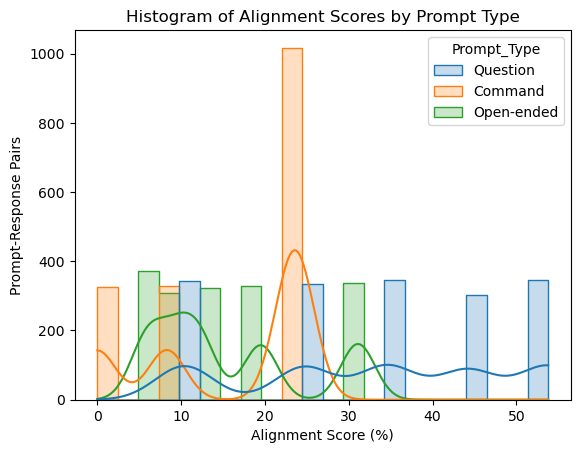

In [ ]:
df["Alignment_Score_Percent"] = (df["Alignment_Score"] * 100).round(1)
sns.histplot(data=df, x="Alignment_Score_Percent",hue="Prompt_Type", kde=True, element="step", common_norm=False)
plt.title("Histogram of Alignment Scores by Prompt Type")
plt.xlabel("Alignment Score (%)")
plt.ylabel("Prompt-Response Pairs")
plt.show()

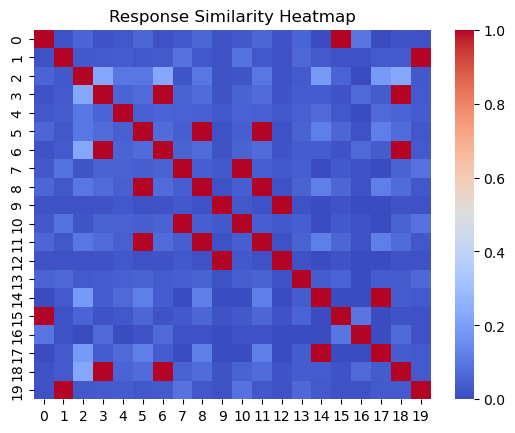

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix for responses
similarity_matrix = cosine_similarity(response_tfidf_matrix)

sns.heatmap(similarity_matrix[:20, :20], cmap="coolwarm")  # limit to 20 for clarity
plt.title("Response Similarity Heatmap")
plt.show()

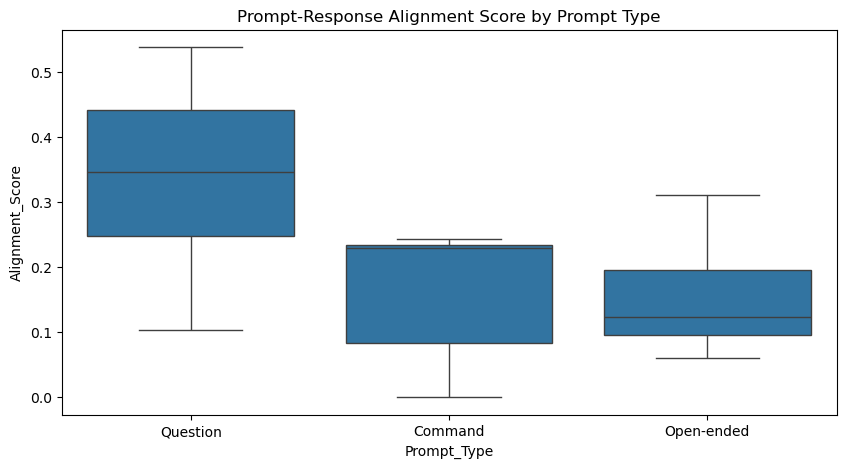

In [17]:
# Visualize alignment scores by Prompt_Type
plt.figure(figsize=(10,5))
sns.boxplot(x="Prompt_Type", y="Alignment_Score", data=df)
plt.title("Prompt-Response Alignment Score by Prompt Type")
plt.show()